## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0,20)
x = np.array(x)
for i in range(np.size(x)):
    y=np.array(-1*x + 2)

In [3]:
#print(x),print(y)

#### Plot your data points. 

<function matplotlib.pyplot.show(close=None, block=None)>

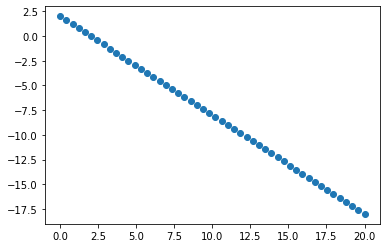

In [4]:
plt.scatter(x,y)
plt.show

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

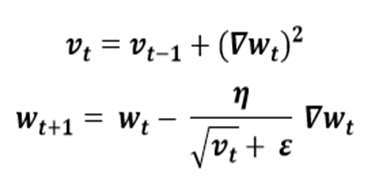

In [5]:
#adagard
def adagrad(x,y,alpha,epsilon,epochs):
    w0=0
    w1=0
    v0=0
    v1=0
    h_lst=[]
    theta0lst=[]
    theta1lst=[]
    no_of_epochs=[]
    cost=[]
    iteration=0
    m=len(x)
    for i in range(epochs):
        h= w0 + (w1 * x)
       
        j=(1/(2*m)*(sum((h-y)**2)))
        grad0=(1/m)*sum((h-y))
        grad1=(1/m)*sum(x*(h-y))
    
        v0=v0 + (grad0)**2 
        v1=v1 + (grad1)**2
      
        w0=w0- ((alpha)/(np.sqrt(v0)+epsilon)*grad0)
        w1=w1- ((alpha)/(np.sqrt(v1)+epsilon)*grad1)
        
        theta0lst.append(w0)
        theta1lst.append(w1)
        iteration=iteration+1
        cost.append(j)
        h_lst.append(h)
        no_of_epochs.append(iteration)
       
        try :
            cond=abs(np.linalg.norm([w0,w1])-np.linalg.norm([theta0lst[-2],theta1lst[-2]]))
            if cond < 0.0001:
                break
        except (IndexError) :
            pass
    return ( cost ,h ,h_lst,theta0lst,theta1lst ,w0,w1, no_of_epochs)

In [6]:
cost ,h ,h_lst,theta0lst,theta1lst ,w0,w1, no_of_epochs=adagrad(x,y,0.1,1e-8,1000)

In [7]:
r2 = r2_score(y, h)
print(r2)

0.9441443204784044


<function matplotlib.pyplot.show(close=None, block=None)>

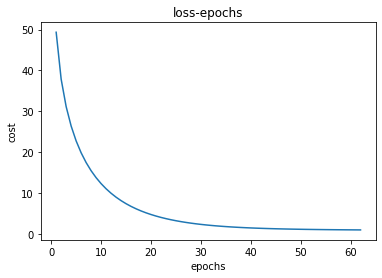

In [8]:
plt.plot(no_of_epochs,cost)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('loss-epochs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

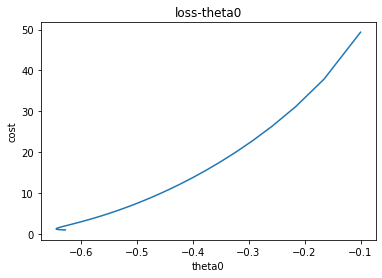

In [9]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('loss-theta0')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

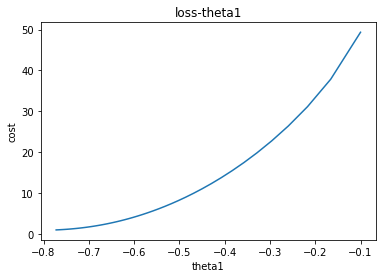

In [10]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('loss-theta1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

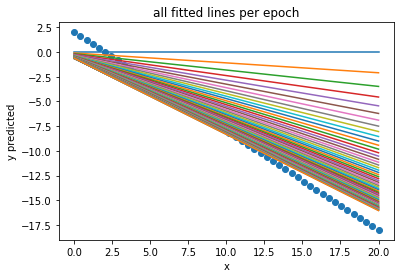

In [11]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.title('all fitted lines per epoch')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

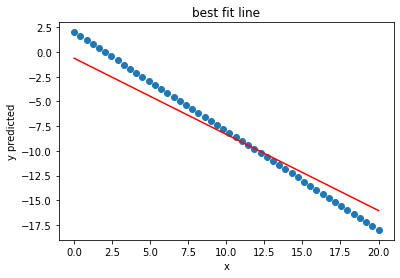

In [12]:
plt.scatter(x,y)
plt.plot(x,h,color='red')
plt.xlabel('x')
plt.ylabel('y predicted')
plt.title('best fit line')
plt.show

In [13]:
#another trial with bigger alpha , not the best results although the accuracy is high
cost ,h ,h_lst,theta0lst,theta1lst ,w0,w1, no_of_epochs=adagrad(x,y,0.9,1e-8,1000)
r2 = r2_score(y, h)
print(r2)

0.9999998626856481


<function matplotlib.pyplot.show(close=None, block=None)>

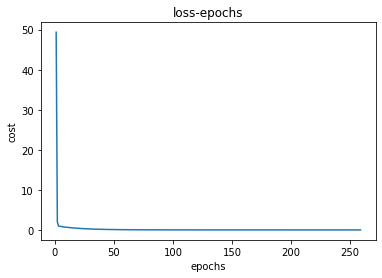

In [14]:
plt.plot(no_of_epochs,cost)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('loss-epochs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

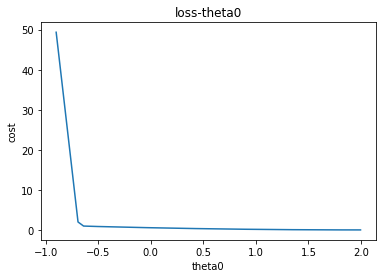

In [15]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('loss-theta0')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

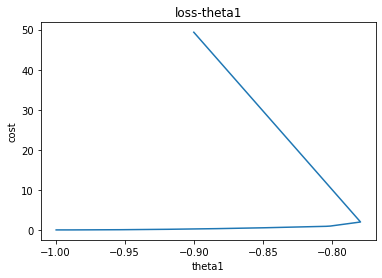

In [16]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('loss-theta1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

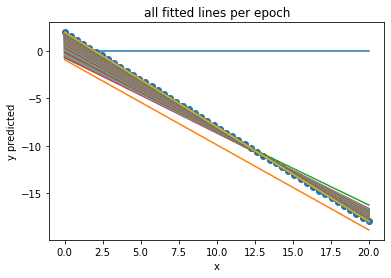

In [17]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.title('all fitted lines per epoch')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

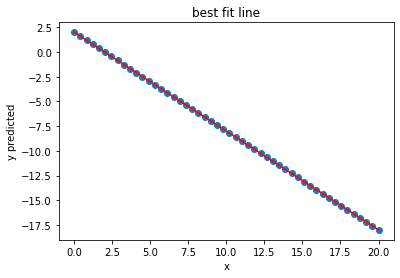

In [18]:
plt.scatter(x,y)
plt.plot(x,h,color='red')
plt.xlabel('x')
plt.ylabel('y predicted')
plt.title('best fit line')
plt.show

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

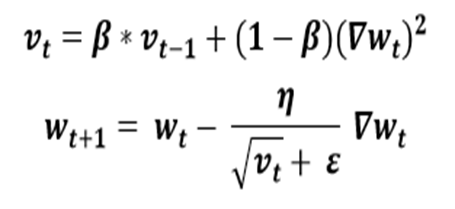

In [19]:
#RMSProp
def RMSProp(x,y,alpha,epsilon,beta,epochs):
    w0=0
    w1=0
    v0=0
    v1=0
    h_lst=[]
    theta0lst=[]
    theta1lst=[]
    no_of_epochs=[]
    cost=[]
    iteration=0
    m=len(x)
    for i in range(epochs):
        h= w0 + w1 * x
       
        j=(1/(2*m)*(np.sum((h-y)**2)))
        grad0=(1/m)*np.sum((h-y))
        grad1=(1/m)*np.sum(x*(h-y))
    
        v0=beta*v0 + (1-beta)*(grad0)**2 
        v1=beta*v1 + (1-beta)*(grad1)**2
      
        w0=w0-(((alpha)/(np.sqrt(v0)+epsilon))*grad0)
        w1=w1-(((alpha)/(np.sqrt(v1)+epsilon))*grad1)
        
        theta0lst.append(w0)
        theta1lst.append(w1)
        iteration=iteration+1
        cost.append(j)
        h_lst.append(h)
        no_of_epochs.append(iteration)
       
        try :
            cond=abs(np.linalg.norm([w0,w1])-np.linalg.norm([theta0lst[-2],theta1lst[-2]]))
            if cond < 0.0001:
                break
        except (IndexError) :
            pass
    return ( cost ,h ,h_lst,theta0lst,theta1lst ,w0,w1, no_of_epochs)

In [20]:
cost ,h ,h_lst,theta0lst,theta1lst ,w0,w1, no_of_epochs=RMSProp(x,y,0.01,1e-8,0.99,1000)

In [21]:
r2 = r2_score(y, h)
print(r2)

0.9440786915818831


<function matplotlib.pyplot.show(close=None, block=None)>

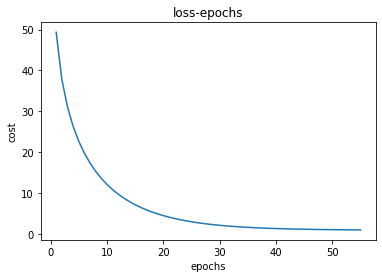

In [22]:
plt.plot(no_of_epochs,cost)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('loss-epochs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

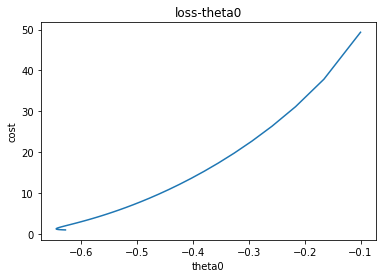

In [23]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('loss-theta0')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

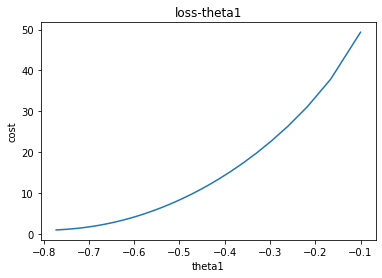

In [24]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('loss-theta1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

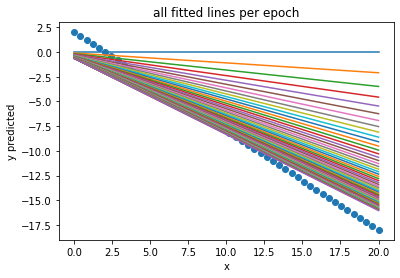

In [25]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.title('all fitted lines per epoch')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

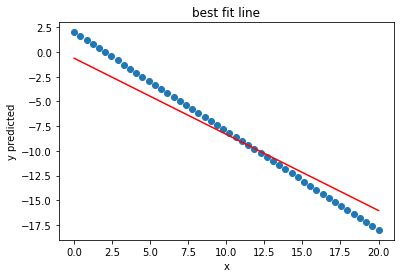

In [26]:
plt.scatter(x,y)
plt.plot(x,h,color='red')
plt.xlabel('x')
plt.ylabel('y predicted')
plt.title('best fit line')
plt.show

In [27]:
#another trial with samller alpha and beta
cost ,h ,h_lst,theta0lst,theta1lst ,w0,w1, no_of_epochs=RMSProp(x,y,0.001,1e-8,0.5,1000)

In [28]:
r2 = r2_score(y, h)
print(r2)

0.92665685868198


<function matplotlib.pyplot.show(close=None, block=None)>

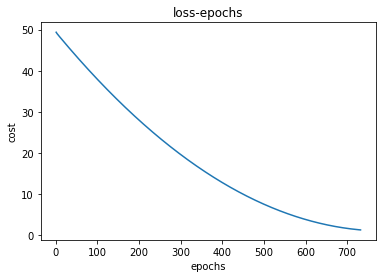

In [29]:
plt.plot(no_of_epochs,cost)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('loss-epochs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

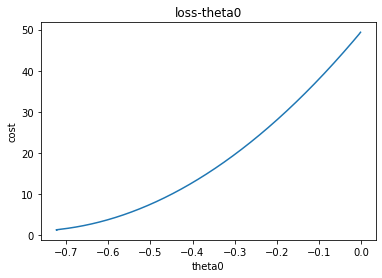

In [30]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('loss-theta0')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

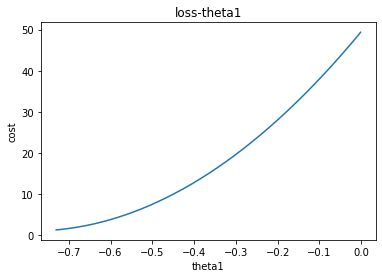

In [31]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('loss-theta1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

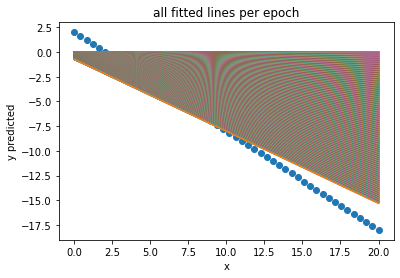

In [32]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.title('all fitted lines per epoch')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

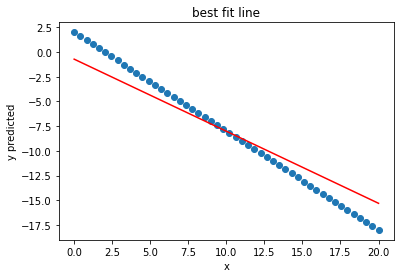

In [33]:
plt.scatter(x,y)
plt.plot(x,h,color='red')
plt.xlabel('x')
plt.ylabel('y predicted')
plt.title('best fit line')
plt.show

In [34]:
cost ,h ,h_lst,theta0lst,theta1lst ,w0,w1, no_of_epochs=RMSProp(x,y,0.01,1e-8,0.7,1000)

In [35]:
r2 = r2_score(y, h)
print(r2)

0.9358759417814658


<function matplotlib.pyplot.show(close=None, block=None)>

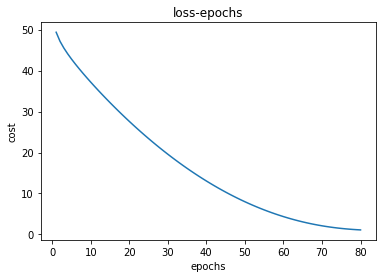

In [36]:
plt.plot(no_of_epochs,cost)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('loss-epochs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

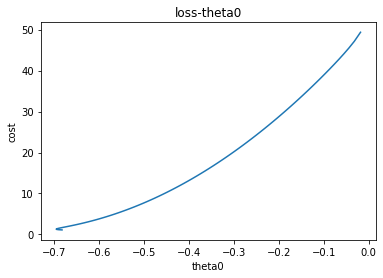

In [37]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('loss-theta0')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

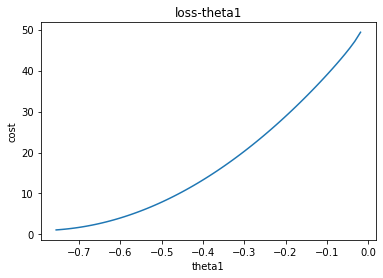

In [38]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('loss-theta1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

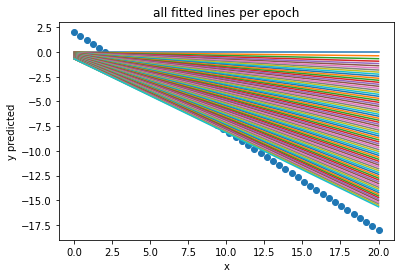

In [39]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.title('all fitted lines per epoch')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

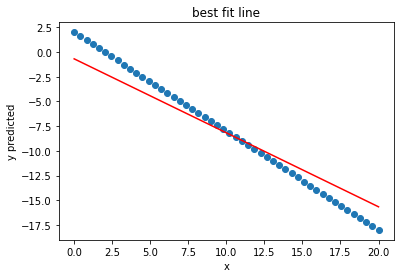

In [40]:
plt.scatter(x,y)
plt.plot(x,h,color='red')
plt.xlabel('x')
plt.ylabel('y predicted')
plt.title('best fit line')
plt.show

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

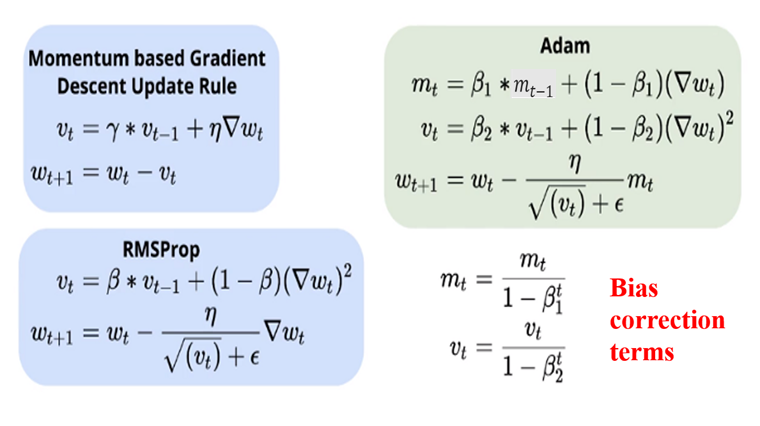

In [41]:
def adam_withcorrection(x,y,alpha,epsilon,beta1,beta2,epochs):
    w0=0
    w1=0
    m0_bc=0
    m1_bc=0
    v0_bc=0
    v1_bc=0
    h_lst=[]
    theta0lst=[]
    theta1lst=[]
    no_of_epochs=[]
    cost=[]
    iteration=0
    m=len(x)
    for i in range(epochs):
        h= w0 + w1 * x
        j=(1/(2*m)*(sum((h-y)**2)))
        
        grad0=(1/m)*sum((h-y))
        grad1=(1/m)*sum(x*(h-y))
        
        m0=(beta1*m0_bc)+ (1-beta1)*grad0
        m0_bc=m0/(1-beta1**(i+1))
        m1=(beta1*m1_bc) + (1-beta1)*grad1
        m1_bc=m1/(1-beta1**(i+1))
        
        v0=(beta2*v0_bc) + (1-beta2)*(grad0)**2 
        v0_bc=v0/(1-beta2**(i+1))
        v1=(beta2*v1_bc) + (1-beta2)*(grad1)**2
        v1_bc=v1/(1-beta2**(i+1))
      
        w0=w0-((alpha/(np.sqrt(v0_bc)+epsilon))*m0_bc)
        w1=w1-((alpha/(np.sqrt(v1_bc)+epsilon))*m1_bc)

        
        theta0lst.append(w0)
        theta1lst.append(w1)
        iteration=iteration+1
        cost.append(j)
        h_lst.append(h)
        no_of_epochs.append(iteration)
       
        try :
            cond=abs(np.linalg.norm([w0,w1])-np.linalg.norm([theta0lst[-2],theta1lst[-2]]))
            if cond < 0.0001:
                break
        except (IndexError) :
            pass
    return ( cost ,h ,h_lst,theta0lst,theta1lst ,w0,w1, no_of_epochs)

In [42]:
cost ,h ,h_lst,theta0lst,theta1lst ,w0,w1, no_of_epochs=adam_withcorrection(x,y,0.1,1e-8,0.8,0.8,1000)

In [43]:
r2 = r2_score(y, h)
print(r2)

0.9999592982825906


<function matplotlib.pyplot.show(close=None, block=None)>

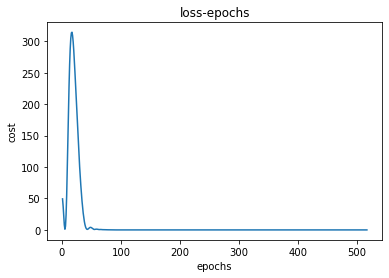

In [44]:
plt.plot(no_of_epochs,cost)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('loss-epochs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

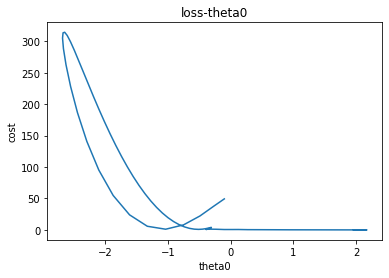

In [45]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('loss-theta0')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

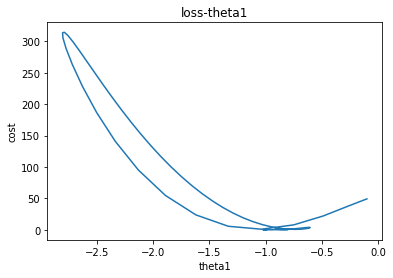

In [46]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('loss-theta1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

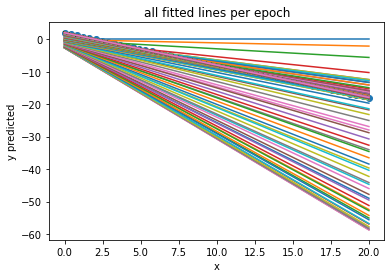

In [47]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.title('all fitted lines per epoch')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

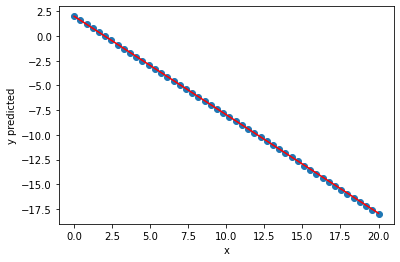

In [48]:
plt.scatter(x,y)
plt.plot(x,h,color='red')
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

In [49]:
cost ,h ,h_lst,theta0lst,theta1lst ,w0,w1, no_of_epochs=adam_withcorrection(x,y,0.4,1e-8,0.9,0.9,1000)

In [50]:
r2 = r2_score(y, h)
print(r2)

0.9998445114227407


<function matplotlib.pyplot.show(close=None, block=None)>

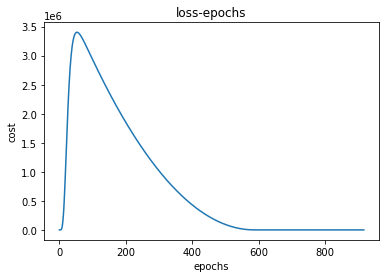

In [51]:
plt.plot(no_of_epochs,cost)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('loss-epochs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

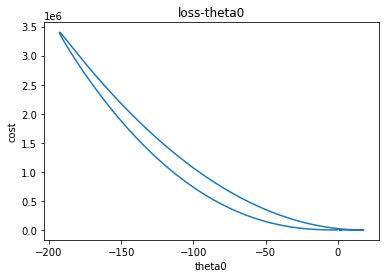

In [52]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('loss-theta0')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

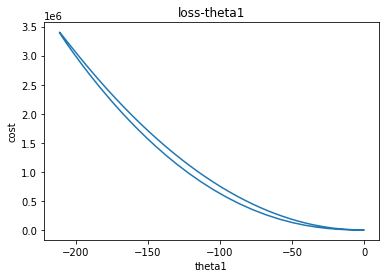

In [53]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('loss-theta1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

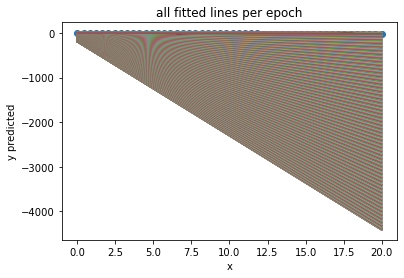

In [54]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.title('all fitted lines per epoch')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

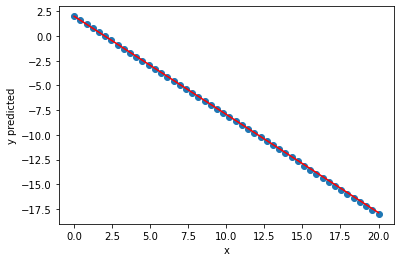

In [55]:
plt.scatter(x,y)
plt.plot(x,h,color='red')
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

In [56]:
#another trial with different parameters , smoother plots with no overshooting and acceptable accuracy
cost ,h ,h_lst,theta0lst,theta1lst ,w0,w1, no_of_epochs=adam_withcorrection(x,y,0.31,1e-8,0.9,0.99,1000)
r2 = r2_score(y, h)
print(r2)

0.9422734041781777


<function matplotlib.pyplot.show(close=None, block=None)>

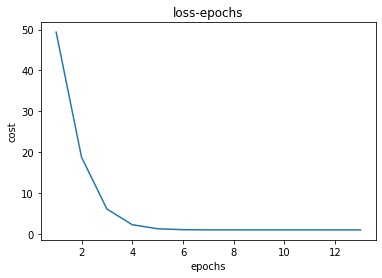

In [57]:
plt.plot(no_of_epochs,cost)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.title('loss-epochs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

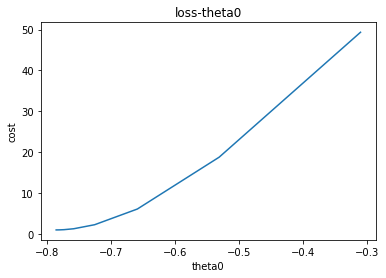

In [58]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('loss-theta0')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

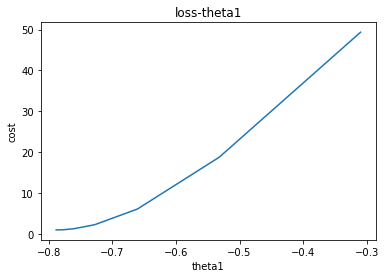

In [59]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('loss-theta1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

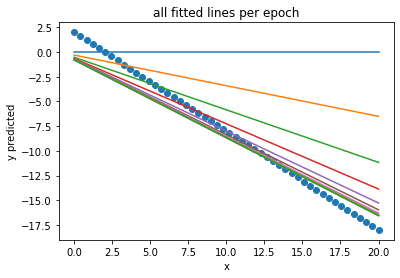

In [60]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.title('all fitted lines per epoch')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

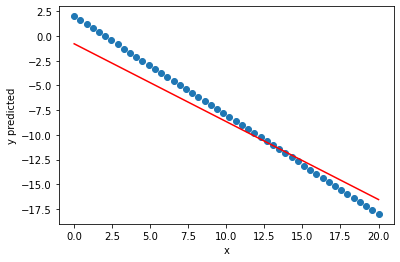

In [61]:
plt.scatter(x,y)
plt.plot(x,h,color='red')
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

## Congratulations 
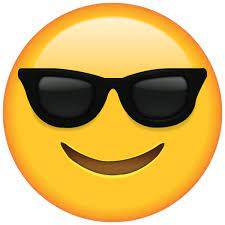